In [21]:
import numpy as np, random, math
from matplotlib import pyplot as plt

In [22]:
l1 = np.array([[1,2],[3,4],[5,6],[8,3],[7,2],[8,8],[1,1],[5,1]])
colors = np.array(['#377eb8','#ff7f00','#4daf4a','#800000','#ff0000', '#00ff00','#00FFFF', '#000080'])

Случайные 4 центра кластеров
[[8. 8.]
 [5. 6.]
 [8. 3.]
 [7. 2.]]
Метрика - euc_dist
Принадлежность к центрам кластеров :  [1 1 1 2 3 0 3 3]
Новые центры кластеров : 
[[8.        8.       ]
 [3.        4.       ]
 [8.        3.       ]
 [4.3333335 1.3333334]]
Принадлежность к центрам кластеров :  [1 1 1 2 2 0 3 3]
Новые центры кластеров : 
[[8.  8. ]
 [3.  4. ]
 [7.5 2.5]
 [3.  1. ]]
Принадлежность к центрам кластеров :  [3 1 1 2 2 0 3 3]
Новые центры кластеров : 
[[8.        8.       ]
 [4.        5.       ]
 [7.5       2.5      ]
 [2.3333333 1.3333334]]
Принадлежность к центрам кластеров :  [3 1 1 2 2 0 3 3]
Новые центры кластеров : 
[[8.        8.       ]
 [4.        5.       ]
 [7.5       2.5      ]
 [2.3333333 1.3333334]]


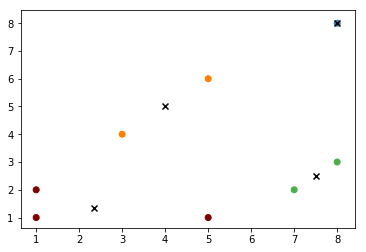

1

In [44]:
class K_means():
    def __init__(self,dataset,metric,n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_n_iter=10
        self.tolerance = 0.01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = np.array([self.dataset[k] for k in random.sample(range(self.dataset.shape[0]),n_clusters)],dtype='f')
        print("Случайные {} центра кластеров".format(n_clusters), self.centroids, sep='\n')
        print("Метрика - {}".format(self.metric))
        
    def get_dist(self, list1,list2):
        if self.metric == 'euc_dist':
            dist = math.sqrt(sum((i - j) ** 2 for i, j in zip(list1, list2)))
        elif self.metric == 'euc_dist2':
            dist = sum((i - j) ** 2 for i, j in zip(list1, list2))
        elif self.metric =='city_block_dist': 
            dist = sum(math.fabs(i - j) for i,j in zip(list1,list2))
        elif self.metric =='cheb_dist':
            dist = max(math.fabs(i - j) for i,j in zip(list1,list2))

        return dist

    def destribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem, center) for center in self.centroids]
            idx = dist.index(min(dist))
            self.labels = np.append(list(self.labels),idx).astype(int)
        print("Принадлежность к центрам кластеров : ", self.labels)
    
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp = temp + self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
        print("Новые центры кластеров : ", self.centroids, sep='\n')
            
    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.destribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i,k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter +=1
        self.fitted = True
        self.draw()
        
    def predict(self, data):
        if self.fitted:
            dist = [self.get_dist(data, center) for center in self.centroids]
            return dist.index(min(dist))
        
    def draw(self):
        if self.dataset.shape[1]==2 and self.n_clusters<10:
          plt.figure()
          plt.scatter(test.dataset[:,0], test.dataset[:,1], c=colors[self.labels])
          plt.scatter(test.centroids[:,0], test.centroids[:,1], marker='x',color='black')
          plt.show()  
    
            
            
metrics = ['euc_dist', 'euc_dist2', 'city_block_dist', 'cheb_dist']
test = K_means(l1,metrics[0],4)
test.fit()
#метод draw() вызывается в методе fit()
test.predict ([4,4])